In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

hdul = fits.open('spec-0271-51883-0005.fits')
hdul

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x122107ac0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x122149930>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x122149990>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x122149c90>]

In [2]:
hdul.info()

Filename: spec-0271-51883-0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     140   ()      
  1  COADD         1 BinTableHDU     26   3827R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [3]:
hdul['PRIMARY'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4482562363.15 / 1st row - Number of seconds since Nov 17 1858  
RA      =            154.26373 / 1st row - Right ascension of telescope boresigh
DEC     =            0.023615  / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '11:50:32.96'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                51883 / MJD of observation                             
MJDLIST = '51879 51883'     

In [4]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3827 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

In [5]:
hdul[1].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

In [6]:
spectrum_data = hdul[1].data
spectrum_data

FITS_rec([(21.53708 , 3.5819, 0.08127065, 0, 0, 1.2916901, 10.570335, 33.403244),
          (24.77743 , 3.582 , 0.07876171, 0, 0, 1.2898893,  9.759857, 33.523865),
          (26.569952, 3.5821, 0.07849586, 0, 0, 1.2939965,  8.42035 , 32.584286),
          ...,
          (70.94079 , 3.9643, 0.19788149, 0, 0, 0.7077166,  6.824827, 70.471954),
          (71.695366, 3.9644, 0.1941352 , 0, 0, 0.7083817,  7.494856, 70.09506 ),
          (69.85985 , 3.9645, 0.19558352, 0, 0, 0.708248 ,  8.147273, 70.59616 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [7]:
type(spectrum_data)

astropy.io.fits.fitsrec.FITS_rec

In [8]:
spectrum_data[0]

(21.53708, 3.5819, 0.08127065, 0, 0, 1.2916901, 10.570335, 33.403244)

In [9]:
from astropy.table import Table

spectrum_data = Table(hdul[1].data)

In [10]:
type(spectrum_data)

astropy.table.table.Table

In [11]:
spectrum_data

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
21.53708,3.5819,0.08127065,0,0,1.2916901,10.570335,33.403244
24.77743,3.582,0.07876171,0,0,1.2898893,9.759857,33.523865
26.569952,3.5821,0.07849586,0,0,1.2939965,8.42035,32.584286
28.445292,3.5822,0.07468648,0,0,1.2940756,7.2095666,32.663204
26.992609,3.5823,0.07433821,0,0,1.2883157,6.943819,33.386795
24.295444,3.5824,0.07521792,0,0,1.2860845,7.4816504,31.322495
25.63897,3.5825,0.072936855,0,0,1.2920122,8.507473,31.526957
23.736605,3.5826,0.06839536,0,0,1.2874743,9.370607,34.28415
22.78346,3.5827,0.07102863,0,0,1.2896937,8.3563795,35.00147


In [12]:
spectrum_data['flux']

21.53708
24.77743
26.569952
28.445292
26.992609
24.295444
25.63897
23.736605
22.78346
31.77656
25.856876


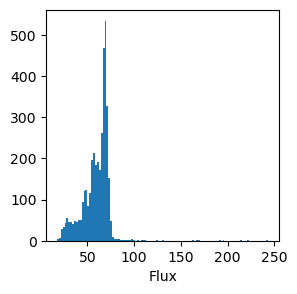

In [18]:
plt.figure(figsize=(3,3))
plt.hist(spectrum_data['flux'], bins='auto')
plt.xlabel('Flux')
plt.show()

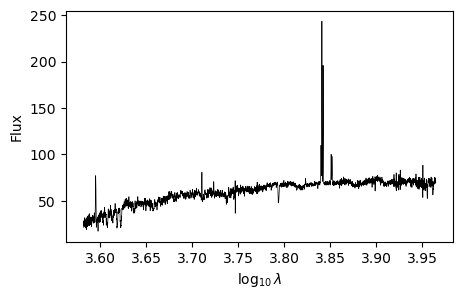

In [25]:
plt.figure(figsize=(5,3))
plt.plot(spectrum_data['loglam'],spectrum_data['flux'], 'k', linewidth=0.5)
plt.xlabel(r'$\log_{10} \lambda$')
plt.ylabel('Flux')
plt.show()

In [26]:
wavelength = np.power(10, spectrum_data['loglam'])

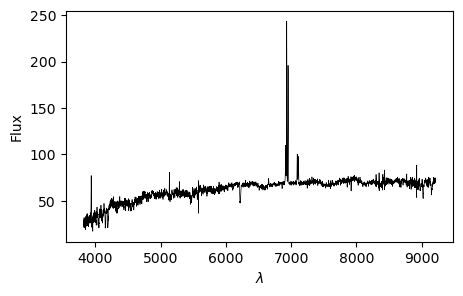

In [28]:
plt.figure(figsize=(5,3))
plt.plot(wavelength,spectrum_data['flux'], 'k', linewidth=0.5)
plt.xlabel(r'$\lambda$')
plt.ylabel('Flux')
plt.show()

In [29]:
spectrum_data.add_column(wavelength, name='lambda')
spectrum_data

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model,lambda
float32,float32,float32,int32,int32,float32,float32,float32,float32
21.53708,3.5819,0.08127065,0,0,1.2916901,10.570335,33.403244,3818.5623
24.77743,3.582,0.07876171,0,0,1.2898893,9.759857,33.523865,3819.4429
26.569952,3.5821,0.07849586,0,0,1.2939965,8.42035,32.584286,3820.3215
28.445292,3.5822,0.07468648,0,0,1.2940756,7.2095666,32.663204,3821.2024
26.992609,3.5823,0.07433821,0,0,1.2883157,6.943819,33.386795,3822.0815
24.295444,3.5824,0.07521792,0,0,1.2860845,7.4816504,31.322495,3822.963
25.63897,3.5825,0.072936855,0,0,1.2920122,8.507473,31.526957,3823.8423
23.736605,3.5826,0.06839536,0,0,1.2874743,9.370607,34.28415,3824.724
22.78346,3.5827,0.07102863,0,0,1.2896937,8.3563795,35.00147,3825.604
